In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
import random

In [ ]:
movie = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")

In [ ]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,169.0,2.5,1.204928e+09
1,1,2471.0,3.0,1.204927e+09
2,1,48516.0,5.0,1.204927e+09
3,2,2571.0,3.5,1.436165e+09
4,2,109487.0,4.0,1.436165e+09


In [ ]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34208 entries, 0 to 34207
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  34208 non-null  int64 
 1   title    34208 non-null  object
 2   genres   34208 non-null  object
dtypes: int64(1), object(2)
memory usage: 801.9+ KB


In [ ]:
ratings.describe()

,userId,movieId,rating,timestamp
count,168037.000000,168036.000000,168036.000000,1.680360e+05
mean,917.777692,11796.732212,3.488187,1.129909e+09
std,528.700357,24848.686091,1.088318,1.797846e+08
min,1.000000,1.000000,0.500000,8.270984e+08
25%,470.000000,920.000000,3.000000,9.764219e+08
50%,886.000000,2355.000000,3.500000,1.116619e+09
75%,1372.000000,5349.000000,4.000000,1.276363e+09
max,1829.000000,150780.000000,5.000000,1.453995e+09


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168037 entries, 0 to 168036
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     168037 non-null  int64  
 1   movieId    168036 non-null  float64
 2   rating     168036 non-null  float64
 3   timestamp  168036 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 5.1 MB


In [ ]:
ratings=ratings.drop('timestamp',axis=1)

In [ ]:
ratings.head()

,userId,movieId,rating
0,1,169.0,2.5
1,1,2471.0,3.0
2,1,48516.0,5.0
3,2,2571.0,3.5
4,2,109487.0,4.0


In [ ]:
ratings.shape

(168037, 3)

In [ ]:
movie.shape

(34208, 3)

In [ ]:
# randomly delete 80% of rows from df
rows_to_delete = ratings.sample(frac=0.8)
ratings = ratings.drop(rows_to_delete.index)

In [ ]:
ratings.shape

(33607, 3)

In [ ]:
df = pd.merge(movie,ratings,how="outer",on="movieId")


In [ ]:
# Filtering data for only 4.2+ ratings
ratings = ratings[ratings['rating'] >= 4.2]

In [ ]:
ratings.shape

(7436, 3)

In [ ]:
df

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,28.0,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,50.0,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,64.0,3.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,75.0,5.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,107.0,4.0
...,...,...,...,...,...
61711,151697,Grand Slam (1967),Thriller,NaN,NaN
61712,151701,Bloodmoney (2010),(no genres listed),NaN,NaN
61713,151703,The Butterfly Circus (2009),Drama,NaN,NaN
61714,151709,Zero (2015),Drama|Sci-Fi,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61716 entries, 0 to 61715
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  61716 non-null  int64  
 1   title    61716 non-null  object 
 2   genres   61716 non-null  object 
 3   userId   33607 non-null  float64
 4   rating   33607 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 2.8+ MB


In [ ]:
df.isnull().sum()


movieId        0
title          0
genres         0
userId     28109
rating     28109
dtype: int64

In [ ]:
len(df['genres'].value_counts())

1446

In [ ]:
df.dropna(axis=0, inplace=True)

# drop columns with null values
df.dropna(axis=1, inplace=True)

In [ ]:
df = df.drop_duplicates()
print(df)

       movieId                                       title  \
0            1                            Toy Story (1995)   
1            1                            Toy Story (1995)   
2            1                            Toy Story (1995)   
3            1                            Toy Story (1995)   
4            1                            Toy Story (1995)   
...        ...                                         ...   
60925   148450                    Rageh Inside Iran (2007)   
60977   148671                                  Saw (2003)   
61017   148775  Wizards of Waverly Place: The Movie (2009)   
61481   150548       Sherlock: The Abominable Bride (2016)   
61548   150776                                  Tag (2015)   

                                               genres  userId  rating  
0         Adventure|Animation|Children|Comedy|Fantasy    28.0     4.0  
1         Adventure|Animation|Children|Comedy|Fantasy    50.0     4.0  
2         Adventure|Animation|Children|

In [ ]:
df.genres.value_counts()


Drama                                             2299
Comedy                                            2216
Comedy|Romance                                    1303
Drama|Romance                                     1124
Comedy|Drama                                      1008
                                                  ... 
Comedy|Documentary|Romance                           1
Fantasy|Mystery|Romance|Thriller                     1
Action|Comedy|Horror|Romance|Sci-Fi                  1
Action|Adventure|Comedy|Drama|Romance                1
Adventure|Children|Comedy|Drama|Fantasy|Sci-Fi       1
Name: genres, Length: 790, dtype: int64

In [ ]:
df.isnull().sum()

movieId    0
title      0
genres     0
userId     0
rating     0
dtype: int64

In [ ]:
df

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,28.0,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,50.0,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,64.0,3.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,75.0,5.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,107.0,4.0
...,...,...,...,...,...
60925,148450,Rageh Inside Iran (2007),Documentary,1502.0,3.5
60977,148671,Saw (2003),Crime|Horror,1573.0,4.5
61017,148775,Wizards of Waverly Place: The Movie (2009),Adventure|Children|Comedy|Drama|Fantasy|Sci-Fi,1573.0,4.0
61481,150548,Sherlock: The Abominable Bride (2016),Action|Crime|Drama|Mystery|Thriller,1132.0,4.0


In [ ]:
import pandas as pd

# assuming your original dataset is named 'dataset'
genres_list = df['genres'].str.split('|')

# convert the list of genres for each row into individual binary columns
genres_df = pd.get_dummies(genres_list.apply(pd.Series).stack()).sum(level=0)

# concatenate the original dataset with the genres_df
df = pd.concat([df, genres_df], axis=1)

# drop the original 'genres' and 'title' columns
df = df.drop(['genres', 'title'], axis=1)

# rename the columns to lowercase for consistency
df.columns = map(str.lower, df.columns)

# preview the modified dataset
df.head()


<ipython-input-27-9269f4a0a0ba>:7: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  genres_df = pd.get_dummies(genres_list.apply(pd.Series).stack()).sum(level=0)


,movieid,userid,rating,(no genres listed),action,adventure,animation,children,comedy,crime,...,film-noir,horror,imax,musical,mystery,romance,sci-fi,thriller,war,western
0,1,28.0,4.0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,50.0,4.0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,64.0,3.0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,75.0,5.0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,107.0,4.0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df

,movieid,userid,rating,(no genres listed),action,adventure,animation,children,comedy,crime,...,film-noir,horror,imax,musical,mystery,romance,sci-fi,thriller,war,western
0,1,28.0,4.0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,50.0,4.0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,64.0,3.0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,75.0,5.0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,107.0,4.0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60925,148450,1502.0,3.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60977,148671,1573.0,4.5,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
61017,148775,1573.0,4.0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
61481,150548,1132.0,4.0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
a_new=df
a_new=a_new.groupby('movieid')["rating"].mean()
a_new

movieid
1         3.886667
2         3.090909
3         3.000000
4         2.666667
5         2.891304
            ...   
148450    3.500000
148671    4.500000
148775    4.000000
150548    4.000000
150776    3.000000
Name: rating, Length: 6099, dtype: float64

In [ ]:
s_movie=a_new.sort_values(ascending=False)
s_movie

movieid
55116     5.0
69805     5.0
5641      5.0
5629      5.0
124521    5.0
         ... 
1355      0.5
5100      0.5
120466    0.5
1313      0.5
2614      0.5
Name: rating, Length: 6099, dtype: float64

In [ ]:
df.isnull().sum()


movieid               0
userid                0
rating                0
(no genres listed)    0
action                0
adventure             0
animation             0
children              0
comedy                0
crime                 0
documentary           0
drama                 0
fantasy               0
film-noir             0
horror                0
imax                  0
musical               0
mystery               0
romance               0
sci-fi                0
thriller              0
war                   0
western               0
dtype: int64

In [ ]:
movie = movie.reset_index()

In [ ]:
movie

,index,movieId,title,genres
0,0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,2,Jumanji (1995),Adventure|Children|Fantasy
2,2,3,Grumpier Old Men (1995),Comedy|Romance
3,3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...,...
34203,34203,151697,Grand Slam (1967),Thriller
34204,34204,151701,Bloodmoney (2010),(no genres listed)
34205,34205,151703,The Butterfly Circus (2009),Drama
34206,34206,151709,Zero (2015),Drama|Sci-Fi


In [ ]:
idx=pd.Series(movie.index, index=movie['movieId'])

In [ ]:
df.head()


,movieid,userid,rating,(no genres listed),action,adventure,animation,children,comedy,crime,...,film-noir,horror,imax,musical,mystery,romance,sci-fi,thriller,war,western
0,1,28.0,4.0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,50.0,4.0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,64.0,3.0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,75.0,5.0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,107.0,4.0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def genre_ratings(ratings, movies, genres, column_names):
 g_ratings = pd.DataFrame()

 for i in genres:
  g_movies = movies[movies['genres'].str.contains(i) ]
  avg_gn = ratings[ratings['movieId'].isin(g_movies['movieId'])].loc[:,['userId', 'rating']].groupby(['userId'])['rating'].median().round(2)

  g_ratings = pd.concat([g_ratings, avg_gn], axis=1)

 print(g_ratings)
 g_ratings.columns = column_names
 return g_ratings

g_ratings = genre_ratings(ratings, movie, ['Romance', 'Sci-Fi', 'Comedy'],['romance_rating', 'scifi_rating', 'comedy_rating'])
g1_ratings = genre_ratings(ratings, movie, ['Action', 'Horror'], ['avg_action_rating', 'avg_horror_rating'])


g1_ratings.head()



      rating  rating  rating
4        5.0     NaN     5.0
13       5.0     5.0     NaN
14       5.0     5.0     5.0
15       4.5     4.5     4.5
16       5.0     NaN     NaN
...      ...     ...     ...
1770     NaN     NaN     5.0
1773     NaN     NaN     5.0
1780     NaN     NaN     5.0
1813     NaN     NaN     5.0
1814     NaN     NaN     5.0

[1000 rows x 3 columns]
      rating  rating
4       5.00     NaN
13      5.00     5.0
14      5.00     NaN
15      4.75     NaN
16      5.00     NaN
...      ...     ...
1633     NaN     5.0
1682     NaN     5.0
1731     NaN     5.0
1734     NaN     5.0
1770     NaN     5.0

[746 rows x 2 columns]


,avg_action_rating,avg_horror_rating
4,5.00,NaN
13,5.00,5.0
14,5.00,NaN
15,4.75,NaN
16,5.00,NaN


In [ ]:
g_ratings.head()

,romance_rating,scifi_rating,comedy_rating
4,5.0,NaN,5.0
13,5.0,5.0,NaN
14,5.0,5.0,5.0
15,4.5,4.5,4.5
16,5.0,NaN,NaN


In [ ]:
def biast(genre_ratings,l,m):
    biased_df = genre_ratings[((genre_ratings['romance_rating'] < l - 0.2) & (genre_ratings['scifi_rating'] > m)) | ((genre_ratings['scifi_rating'] < l) & (genre_ratings['romance_rating'] > m))]
    biased_df = pd.concat([biased_df[:300], genre_ratings[:2]], axis=0)
    biased_df.reset_index(drop=True, inplace=True)
    return biased_df

biased_df = biast(g_ratings, 4.0, 3.5)

In [ ]:
print(" records:", len(biased_df))
biased_df.head()


 records: 2


,romance_rating,scifi_rating,comedy_rating
0,5.0,NaN,5.0
1,5.0,5.0,NaN


In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
x = biased_df[['scifi_rating','romance_rating','comedy_rating']].values
data = biased_df[['scifi_rating','romance_rating','comedy_rating']]


# Create an imputer object with a suitable strategy (e.g., mean, median, etc.)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to the data and transform the data
x = imputer.fit_transform(x)

In [ ]:
rat = pd.merge(ratings, movie[['movieId', 'title']], on='movieId' )
rat.head()

,userId,movieId,rating,title
0,1,48516.0,5.0,"Departed, The (2006)"
1,237,48516.0,5.0,"Departed, The (2006)"
2,409,48516.0,4.5,"Departed, The (2006)"
3,445,48516.0,5.0,"Departed, The (2006)"
4,635,48516.0,5.0,"Departed, The (2006)"


In [ ]:
given_ratings = pd.pivot_table(rat, index='userId', columns= 'title', values='rating')
given_ratings.iloc[:6, :10]

title,"'burbs, The (1989)",(500) Days of Summer (2009),*batteries not included (1987),10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),127 Hours (2010),"13th Warrior, The (1999)",1984 (Nineteen Eighty-Four) (1984)
userId,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def sort_density(given_ratings, n_movies, n_users):
 m = get_most_rat(given_ratings, n_movies)
 m = get_users_who_rate_the_most(given_ratings, n_users)
 return m


In [ ]:
def get_most_rat(given_ratings, max_movies):
    counts = given_ratings.sum()
    given_ratings = given_ratings.append(given_ratings.count(), ignore_index=True)

    print(given_ratings)
    sorted = given_ratings.sort_values(len(given_ratings)-1, axis=1, ascending=False)
    sorted = sorted.drop(sorted.tail(1).index)
    most_rat = sorted.iloc[:max_movies]
    return most_rat


In [ ]:
def get_users_who_rate_the_most(most_rat,max_movies ):
    most_rat['counts'] = pd.Series(most_rat.count(axis=1))
    most_rat_users = most_rat.sort_values('counts', ascending=False)
    most_rat_select = most_rat_users.iloc[:max_movies, :]
    most_rat_select = most_rat_select.drop(['counts'], axis=1)
    return most_rat_select


In [ ]:
n_movies = 30
n_users = 18
most_rat_select = sort_density(given_ratings, n_movies, n_users)
most_rat_select.head()

title  'burbs, The (1989)  (500) Days of Summer (2009)  \
0                     NaN                          NaN   
1                     NaN                          NaN   
2                     NaN                          NaN   
3                     NaN                          NaN   
4                     NaN                          NaN   
...                   ...                          ...   
1240                  NaN                          NaN   
1241                  NaN                          NaN   
1242                  NaN                          NaN   
1243                  NaN                          NaN   
1244                  1.0                          4.0   

title  *batteries not included (1987)  10 Things I Hate About You (1999)  \
0                                 NaN                                NaN   
1                                 NaN                                NaN   
2                                 NaN                                NaN   

<ipython-input-47-521ebbeec1e3>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  given_ratings = given_ratings.append(given_ratings.count(), ignore_index=True)


title,"'burbs, The (1989)",(500) Days of Summer (2009),*batteries not included (1987),10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),127 Hours (2010),"13th Warrior, The (1999)",1984 (Nineteen Eighty-Four) (1984),...,Your Friends and Neighbors (1998),Zach Galifianakis: Live at the Purple Onion (2006),Zack and Miri Make a Porno (2008),Zelig (1983),Zero Effect (1998),Zodiac (2007),Zombie (a.k.a. Zombie 2: The Dead Are Among Us) (Zombi 2) (1979),Zombieland (2009),Zoolander (2001),[REC] (2007)
userId,,,,,,,,,,,,,,,,,,,,,
670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN
277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
most_rat_select.shape

(18, 2293)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable



In [ ]:
def draw_movies_heatmap(most_rat_select, axis_labels=True):



 fig = plt.figure(figsize=(15,4))
 ax = plt.gca()

# Draw heatmap
 heatmap = ax.imshow(most_rat_select, interpolation='nearest', vmin=0, vmax=5, aspect='auto')
 if axis_labels:
  ax.set_yticks(np.arange(most_rat_select.shape[0]) , minor=False)
  ax.set_xticks(np.arange(most_rat_select.shape[1]) , minor=False)
  ax.invert_yaxis()
  ax.xaxis.tick_top()
  labels = most_rat_select.columns.str[:40]
  ax.set_xticklabels(labels, minor=False)
  ax.set_yticklabels(most_rat_select.index, minor=False)
  plt.setp(ax.get_xticklabels(), rotation=90)

 else:
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

 ax.grid(False)
 ax.set_ylabel('User id')

 # Separate heatmap from color bar
 divider = make_axes_locatable(ax)
 cax = divider.append_axes("right", size="5%", pad=0.05)

 # Color bar
 cbar = fig.colorbar(heatmap, ticks=[5, 4, 3, 2, 1, 0], cax=cax)
 cbar.ax.set_yticklabels(['5 stars', '4 stars','3 stars','2 stars','1 stars','0 stars'])
 plt.show()

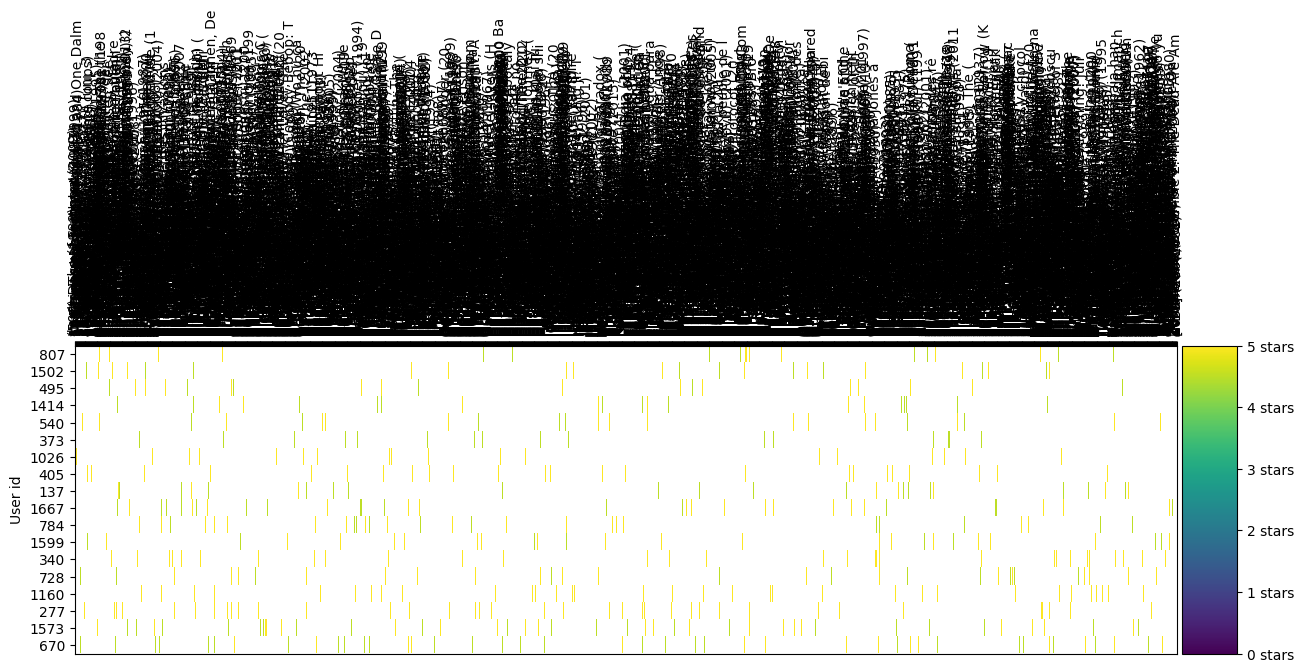

In [ ]:
draw_movies_heatmap(most_rat_select)

In [ ]:
_ratings = given_ratings.sort_index()
most_rat_1 = get_most_rat(given_ratings, 1000)

title  'burbs, The (1989)  (500) Days of Summer (2009)  \
0                     NaN                          NaN   
1                     NaN                          NaN   
2                     NaN                          NaN   
3                     NaN                          NaN   
4                     NaN                          NaN   
...                   ...                          ...   
1240                  NaN                          NaN   
1241                  NaN                          NaN   
1242                  NaN                          NaN   
1243                  NaN                          NaN   
1244                  1.0                          4.0   

title  *batteries not included (1987)  10 Things I Hate About You (1999)  \
0                                 NaN                                NaN   
1                                 NaN                                NaN   
2                                 NaN                                NaN   

<ipython-input-47-521ebbeec1e3>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  given_ratings = given_ratings.append(given_ratings.count(), ignore_index=True)


In [ ]:
def sparse_clustering_errors(k, data):
    # Create an instance of the KMeans class with the given number of clusters
    kmeans = KMeans(n_clusters=k)

    # Fit the model to the data and obtain the predicted cluster labels
    kmeans.fit(data)
    predictions = kmeans.predict(data)

    # Obtain the cluster centers and compute the mean squared error for each point
    cluster_centers = kmeans.cluster_centers_
    errors = []
    for i in range(len(data)):
        error = np.mean((data[i] - cluster_centers[predictions[i]]) ** 2)
        errors.append(error)

    # Compute the sum of mean squared errors and return it
    return sum(errors)


In [ ]:
from scipy.sparse import csr_matrix
import scipy.sparse as sp

s_r = csr_matrix(most_rat_1)

In [ ]:
def draw_movie_clusters(clustered, max_users, maxi_movies):
    c=1
    for cluster_id in clustered.group.unique():
        # To improve visibility, we're showing at most max_users users and max_movies movies per cluster.
        # You can change these values to see more users & movies per cluster
        d = clustered[clustered.group == cluster_id].drop(['index', 'group'], axis=1)
        n_users_in_cluster = d.shape[0]

        d = sort_density(d, maxi_movies, max_users)

        d = d.reindex(d.mean().sort_values(ascending=False).index, axis=1)
        d = d.reindex(d.count(axis=1).sort_values(ascending=False).index)
        d = d.iloc[:max_users, :maxi_movies]

        n_users_in_plot = d.shape[0]

        # We're only selecting to show clusters that have more than 9 users, otherwise, they're less interesting
        if len(d) > 9:
            print('cluster # {}'.format(cluster_id))
            print('# of users in cluster: {}.'.format(n_users_in_cluster), '# of users in plot: {}'.format(n_users_in_plot))
            fig = plt.figure(figsize=(15,4))
            ax = plt.gca()
            ax.invert_yaxis()
            ax.xaxis.tick_top()
            labels = d.columns.str[:40]
            ax.set_yticks(np.arange(d.shape[0]) , minor=False)
            ax.set_xticks(np.arange(d.shape[1]) , minor=False)
            ax.set_xticklabels(labels, minor=False)
            ax.get_yaxis().set_visible(False)

            # Heatmap
            heatmap = ax.imshow(d, vmin=0, vmax=5, cmap='YlGnBu', interpolation='nearest', aspect='auto')

            ax.set_xlabel('movies')
            ax.set_ylabel('User id')
            divider = make_axes_locatable(ax)
            cax = divider.append_axes("right", size="5%", pad=0.05)

            # Color bar
            cbar = fig.colorbar(heatmap, ticks=[0, 1, 2, 3, 4, 5], cax=cax)
            cbar.ax.set_yticklabels(['0 stars', '1 star','2 stars','3 stars','4 stars','5 stars'])
            plt.setp(ax.get_xticklabels(), rotation=90, fontsize=9)
            plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, labelbottom=False, labelleft=False)
            plt.show()


In [ ]:
def biast(genre_ratings,l,m):
    biased_df = genre_ratings[((genre_ratings['romance_rating'] < l - 0.2) & (genre_ratings['scifi_rating'] > m)) | ((genre_ratings['scifi_rating'] < l) & (genre_ratings['romance_rating'] > m))]
    biased_df = pd.concat([biased_df[:300], genre_ratings[:2]], axis=0)
    biased_df.reset_index(drop=True, inplace=True)
    return biased_df



In [ ]:
def sort_density(given_ratings, n_movies, n_users):
 m = get_most_rat(given_ratings, n_movies)
 m = get_users_who_rate_the_most(given_ratings, n_users)
 return m


In [ ]:
import helper
import importlib
importlib.reload(helper)

<module 'helper' (<_frozen_importlib_external._NamespaceLoader object at 0x7f8e380e0640>)>

In [ ]:
# Create an imputer object with a suitable strategy (e.g., mean, median, etc.)
imp = SimpleImputer(strategy='mean')

# Fit the imputer to the data and transform the data
s_r = imp.fit_transform(s_r)

In [ ]:
print(s_r)

  (0, 0)	1.0
  (1, 0)	1.0
  (2, 0)	8.0
  (3, 0)	1.0
  (4, 0)	1.0
  (5, 0)	2.0
  (6, 0)	6.0
  (7, 0)	2.0
  (8, 0)	13.0
  (9, 0)	4.0
  (10, 0)	24.0
  (11, 0)	3.0
  (12, 0)	9.0
  (13, 0)	14.0
  (14, 0)	16.0
  (15, 0)	4.0
  (16, 0)	9.0
  (17, 0)	13.0
  (18, 0)	1.0
  (19, 0)	11.0
  (20, 0)	1.0
  (21, 0)	1.0
  (22, 0)	1.0
  (23, 0)	2.0
  (24, 0)	21.0
  :	:
  (975, 2049)	5.0
  (976, 2049)	5.0
  (977, 2049)	5.0
  (978, 2049)	5.0
  (979, 2049)	5.0
  (980, 2049)	5.0
  (981, 2049)	5.0
  (982, 2049)	5.0
  (983, 2049)	5.0
  (984, 2049)	5.0
  (985, 2049)	5.0
  (986, 2049)	5.0
  (987, 2049)	5.0
  (988, 2049)	5.0
  (989, 2049)	5.0
  (990, 2049)	5.0
  (991, 2049)	5.0
  (992, 2049)	5.0
  (993, 2049)	5.0
  (994, 2049)	5.0
  (995, 2049)	5.0
  (996, 2049)	5.0
  (997, 2049)	5.0
  (998, 2049)	5.0
  (999, 2049)	5.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-47-521ebbeec1e3>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  given_ratings = given_ratings.append(given_ratings.count(), ignore_index=True)


     counts  Shawshank Redemption, The (1994)  Pulp Fiction (1994)  \
0         1                               NaN                  NaN   
1         1                               NaN                  NaN   
2         1                               NaN                  NaN   
3         1                               NaN                  NaN   
4         1                               NaN                  NaN   
..      ...                               ...                  ...   
272       1                               NaN                  NaN   
273       1                               NaN                  NaN   
274       1                               NaN                  NaN   
275       1                               NaN                  NaN   
276     276                               9.0                  5.0   

     Forrest Gump (1994)  Star Wars: Episode IV - A New Hope (1977)  \
0                    NaN                                        NaN   
1                

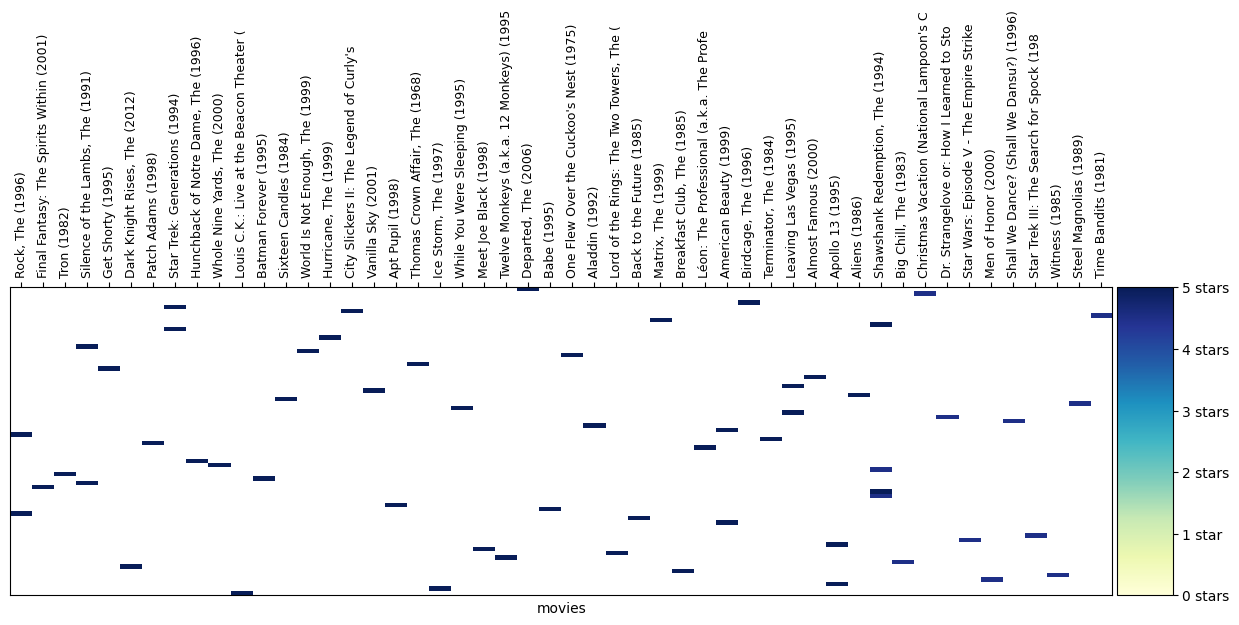

<ipython-input-47-521ebbeec1e3>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  given_ratings = given_ratings.append(given_ratings.count(), ignore_index=True)


    counts  Shawshank Redemption, The (1994)  Pulp Fiction (1994)  \
0        8                               NaN                  NaN   
1        7                               NaN                  NaN   
2        8                               NaN                  NaN   
3        8                               NaN                  NaN   
4        7                               NaN                  5.0   
..     ...                               ...                  ...   
60       7                               NaN                  NaN   
61       8                               NaN                  NaN   
62       8                               NaN                  NaN   
63       7                               NaN                  NaN   
64      64                               3.0                  5.0   

    Forrest Gump (1994)  Star Wars: Episode IV - A New Hope (1977)  \
0                   NaN                                        NaN   
1                   NaN        

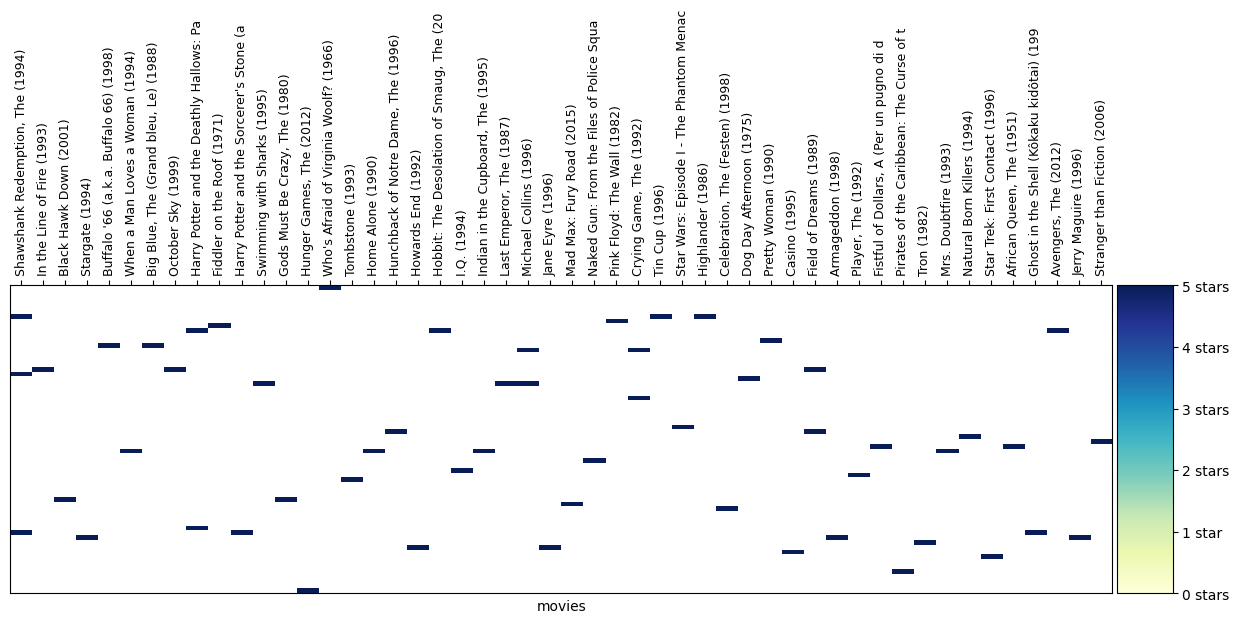

<ipython-input-47-521ebbeec1e3>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  given_ratings = given_ratings.append(given_ratings.count(), ignore_index=True)


     counts  Shawshank Redemption, The (1994)  Pulp Fiction (1994)  \
0         2                               NaN                  NaN   
1         2                               NaN                  NaN   
2         2                               NaN                  NaN   
3         2                               NaN                  NaN   
4         2                               NaN                  NaN   
..      ...                               ...                  ...   
162       2                               NaN                  5.0   
163       2                               NaN                  NaN   
164       2                               NaN                  NaN   
165       2                               NaN                  NaN   
166     166                               8.0                  7.0   

     Forrest Gump (1994)  Star Wars: Episode IV - A New Hope (1977)  \
0                    NaN                                        NaN   
1                

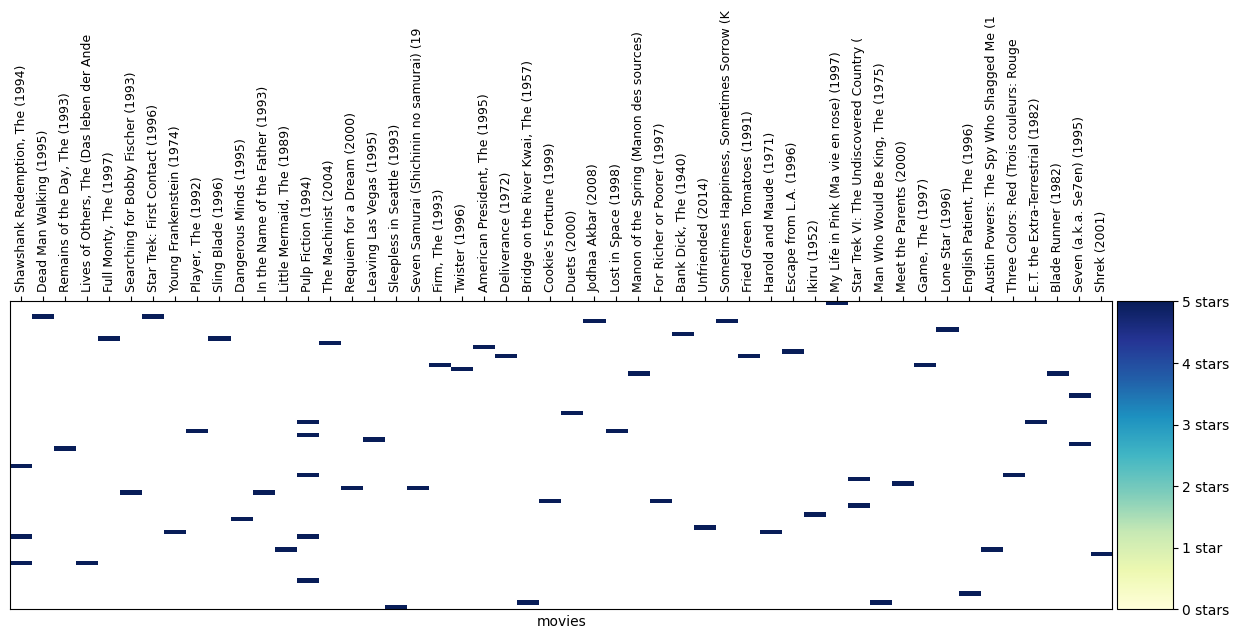

<ipython-input-47-521ebbeec1e3>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  given_ratings = given_ratings.append(given_ratings.count(), ignore_index=True)


    counts  Shawshank Redemption, The (1994)  Pulp Fiction (1994)  \
0        6                               NaN                  NaN   
1        6                               NaN                  NaN   
2        6                               NaN                  NaN   
3        6                               NaN                  NaN   
4        6                               NaN                  NaN   
5        6                               NaN                  NaN   
6        6                               NaN                  NaN   
7        6                               NaN                  NaN   
8        6                               NaN                  NaN   
9        6                               NaN                  NaN   
10       6                               NaN                  NaN   
11       6                               NaN                  NaN   
12       6                               NaN                  NaN   
13       6                        

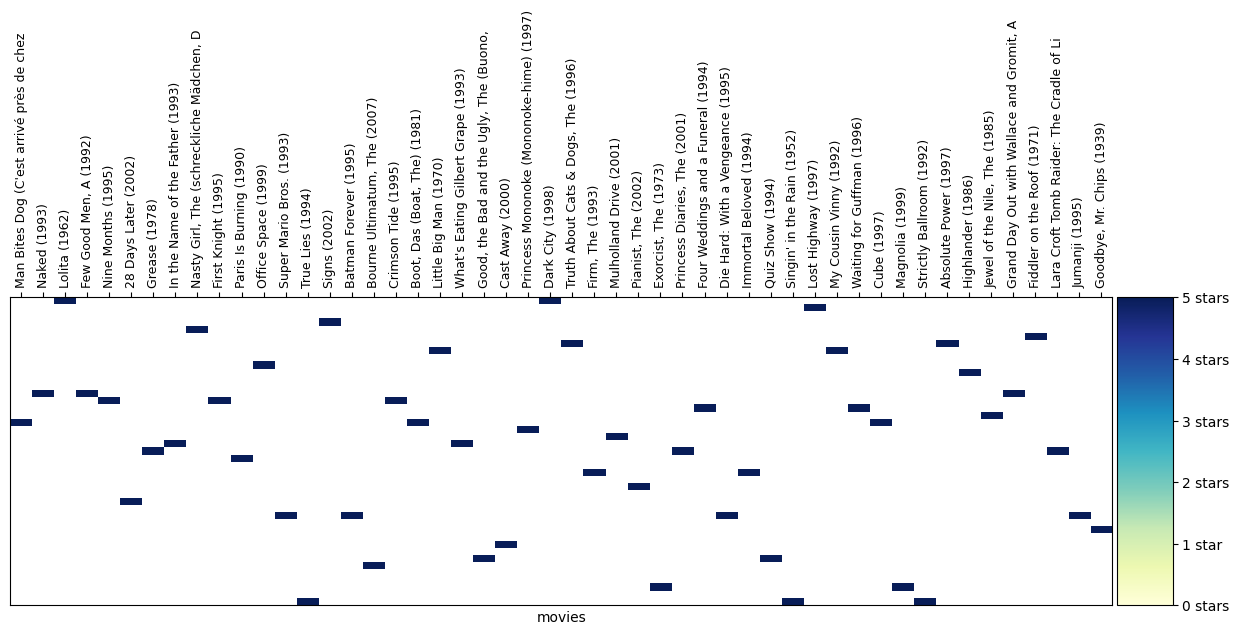

<ipython-input-47-521ebbeec1e3>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  given_ratings = given_ratings.append(given_ratings.count(), ignore_index=True)


    counts  Shawshank Redemption, The (1994)  Pulp Fiction (1994)  \
0       13                               NaN                  NaN   
1       13                               5.0                  NaN   
2       13                               NaN                  NaN   
3       12                               NaN                  NaN   
4       13                               NaN                  NaN   
5       12                               NaN                  NaN   
6       13                               NaN                  NaN   
7       12                               NaN                  5.0   
8       12                               NaN                  NaN   
9       12                               NaN                  NaN   
10      13                               NaN                  NaN   
11      12                               NaN                  NaN   
12      12                               NaN                  NaN   
13      12                        

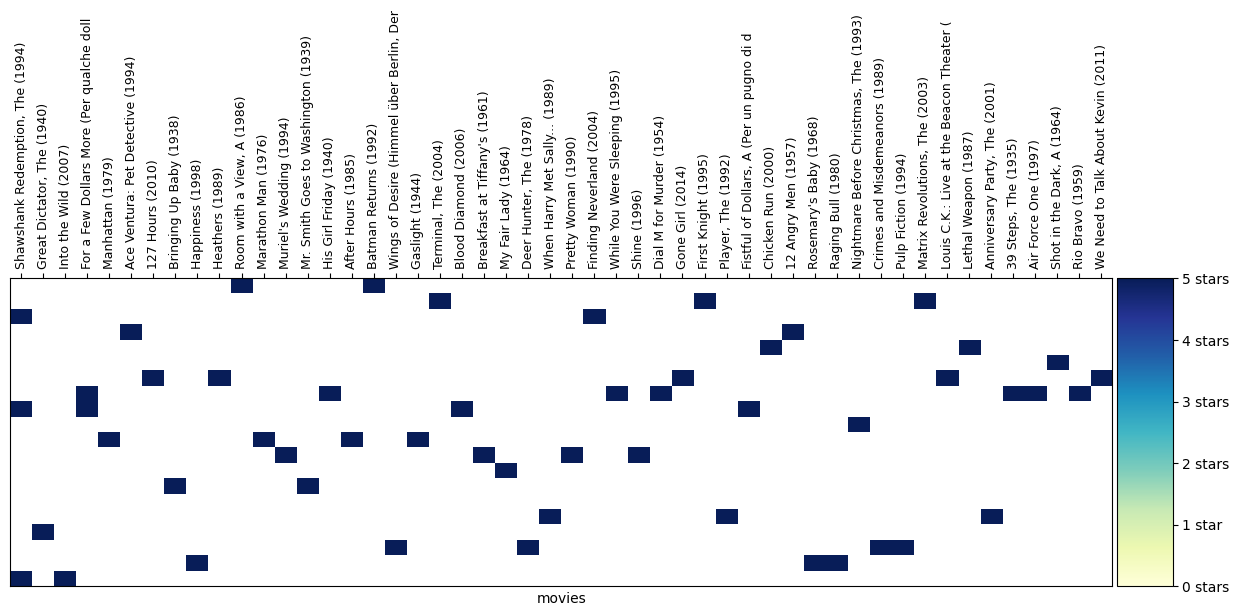

<ipython-input-47-521ebbeec1e3>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  given_ratings = given_ratings.append(given_ratings.count(), ignore_index=True)


    counts  Shawshank Redemption, The (1994)  Pulp Fiction (1994)  \
0        4                               NaN                  NaN   
1        4                               NaN                  NaN   
2        4                               NaN                  NaN   
3        4                               NaN                  NaN   
4        4                               NaN                  NaN   
..     ...                               ...                  ...   
79       4                               NaN                  NaN   
80       4                               NaN                  NaN   
81       4                               NaN                  NaN   
82       4                               NaN                  5.0   
83      83                               5.0                  3.0   

    Forrest Gump (1994)  Star Wars: Episode IV - A New Hope (1977)  \
0                   NaN                                        NaN   
1                   NaN        

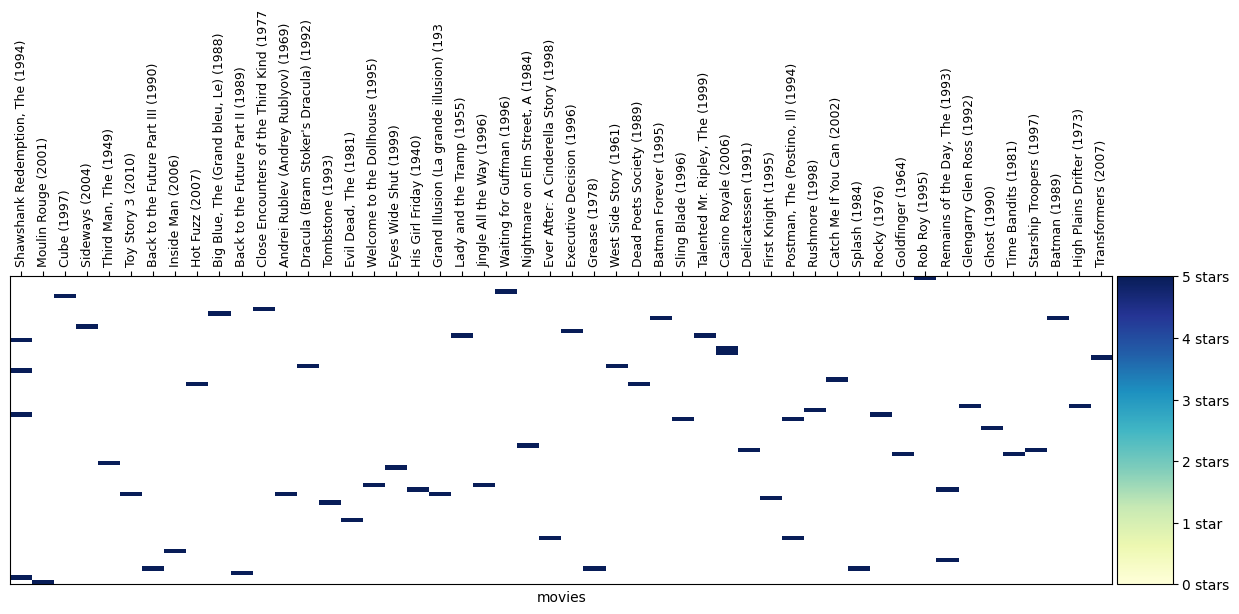

<ipython-input-47-521ebbeec1e3>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  given_ratings = given_ratings.append(given_ratings.count(), ignore_index=True)


    counts  Shawshank Redemption, The (1994)  Pulp Fiction (1994)  \
0       24                               NaN                  NaN   
1       21                               5.0                  NaN   
2       25                               NaN                  NaN   
3       22                               NaN                  NaN   
4       22                               5.0                  NaN   
5       24                               NaN                  NaN   
6       24                               NaN                  NaN   
7       24                               NaN                  NaN   
8       21                               NaN                  NaN   
9       23                               NaN                  NaN   
10      23                               NaN                  NaN   
11      25                               NaN                  NaN   
12      25                               NaN                  NaN   
13      24                        

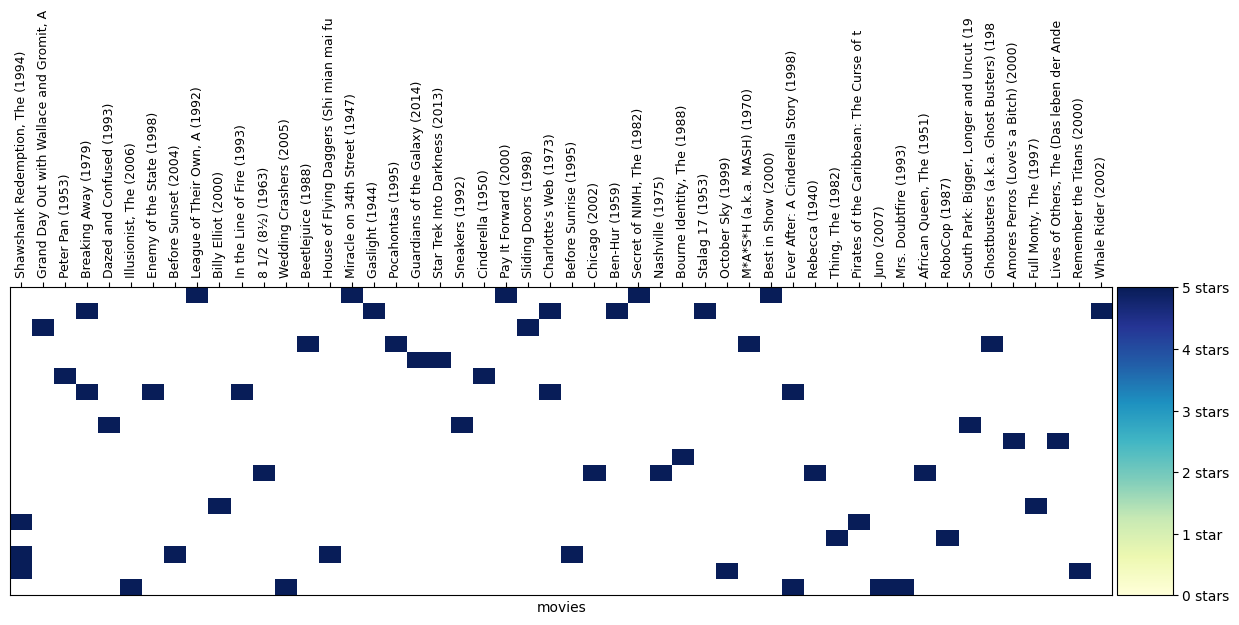

<ipython-input-47-521ebbeec1e3>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  given_ratings = given_ratings.append(given_ratings.count(), ignore_index=True)


     counts  Shawshank Redemption, The (1994)  Pulp Fiction (1994)  \
0         3                               NaN                  NaN   
1         3                               NaN                  NaN   
2         3                               NaN                  NaN   
3         3                               NaN                  NaN   
4         3                               NaN                  NaN   
..      ...                               ...                  ...   
114       3                               NaN                  NaN   
115       3                               NaN                  NaN   
116       3                               NaN                  NaN   
117       3                               NaN                  NaN   
118     118                               5.0                  5.0   

     Forrest Gump (1994)  Star Wars: Episode IV - A New Hope (1977)  \
0                    NaN                                        NaN   
1                

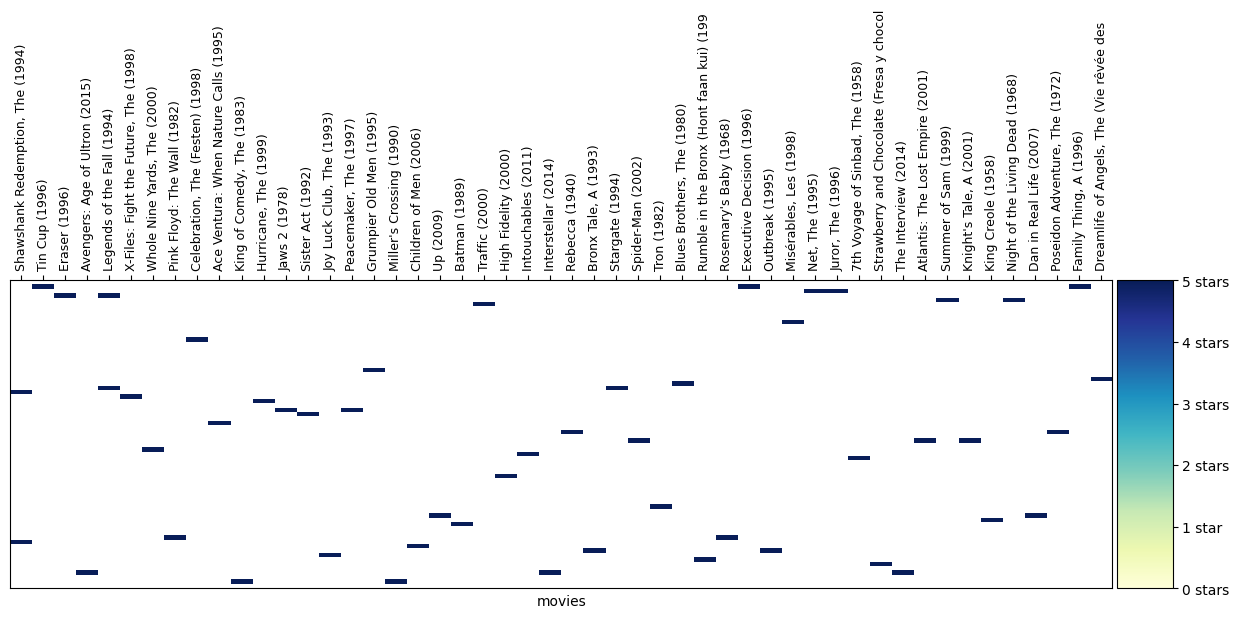

<ipython-input-47-521ebbeec1e3>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  given_ratings = given_ratings.append(given_ratings.count(), ignore_index=True)


    counts  Shawshank Redemption, The (1994)  Pulp Fiction (1994)  \
0        9                               NaN                  NaN   
1        9                               NaN                  NaN   
2        9                               NaN                  NaN   
3        9                               NaN                  NaN   
4        9                               NaN                  NaN   
5        9                               NaN                  NaN   
6        9                               NaN                  NaN   
7        9                               NaN                  NaN   
8        9                               NaN                  NaN   
9        9                               NaN                  NaN   
10       9                               NaN                  4.5   
11       9                               NaN                  NaN   
12       9                               5.0                  NaN   
13       9                        

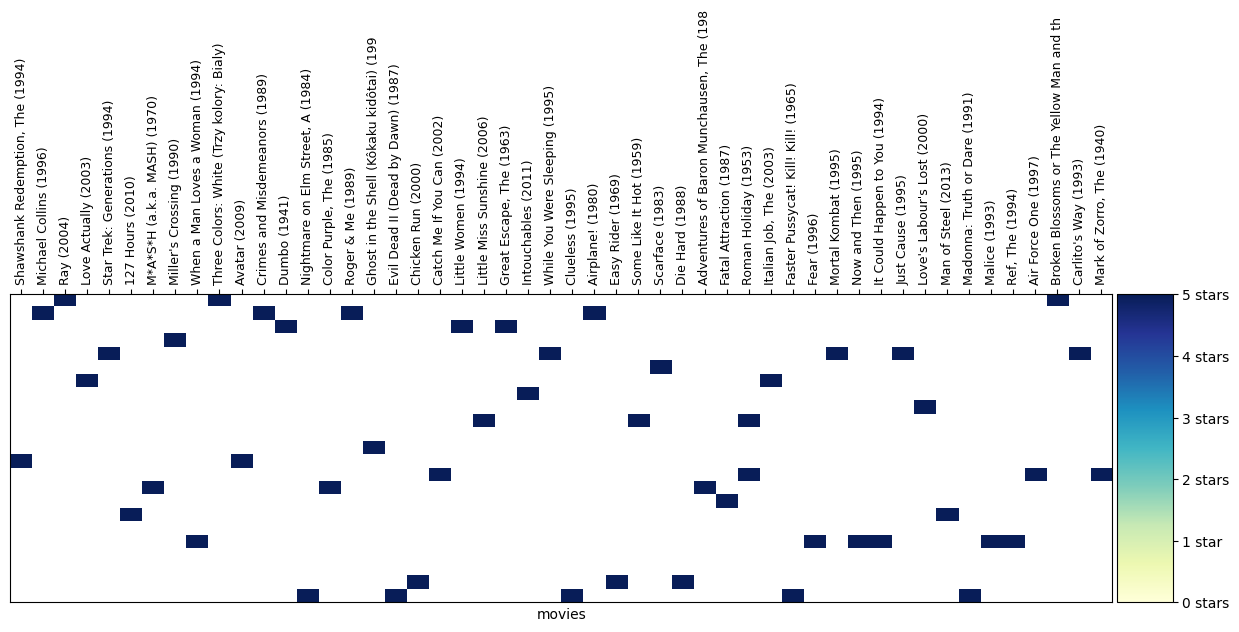

<ipython-input-47-521ebbeec1e3>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  given_ratings = given_ratings.append(given_ratings.count(), ignore_index=True)


    counts  Shawshank Redemption, The (1994)  Pulp Fiction (1994)  \
0       14                               NaN                  NaN   
1       16                               4.5                  NaN   
2       15                               NaN                  NaN   
3       14                               NaN                  NaN   
4       14                               NaN                  NaN   
5       14                               NaN                  NaN   
6       16                               NaN                  NaN   
7       15                               NaN                  NaN   
8       14                               NaN                  NaN   
9       16                               NaN                  NaN   
10      15                               NaN                  NaN   
11      16                               NaN                  5.0   
12      14                               NaN                  NaN   
13      15                        

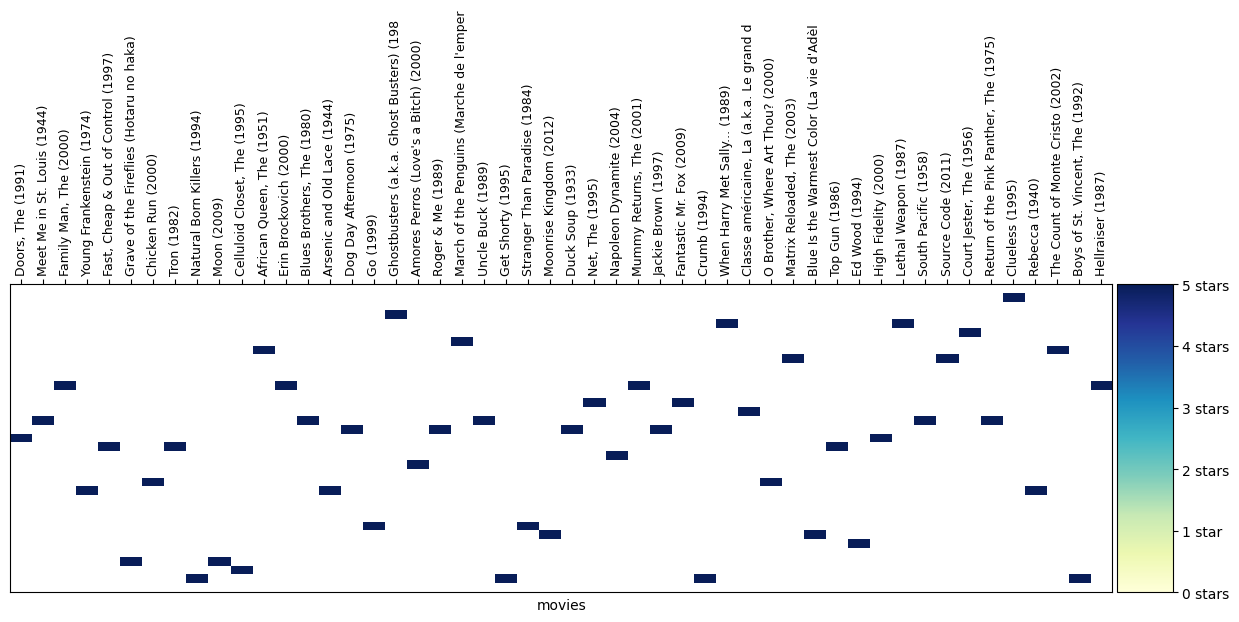

<ipython-input-47-521ebbeec1e3>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  given_ratings = given_ratings.append(given_ratings.count(), ignore_index=True)


    counts  Shawshank Redemption, The (1994)  Pulp Fiction (1994)  \
0       11                               NaN                  NaN   
1       10                               5.0                  NaN   
2       10                               NaN                  NaN   
3       10                               NaN                  NaN   
4       11                               NaN                  NaN   
5       10                               NaN                  NaN   
6       11                               NaN                  NaN   
7       11                               NaN                  NaN   
8       10                               NaN                  NaN   
9       10                               5.0                  NaN   
10      11                               NaN                  5.0   
11      10                               NaN                  NaN   
12      11                               NaN                  NaN   
13      10                        

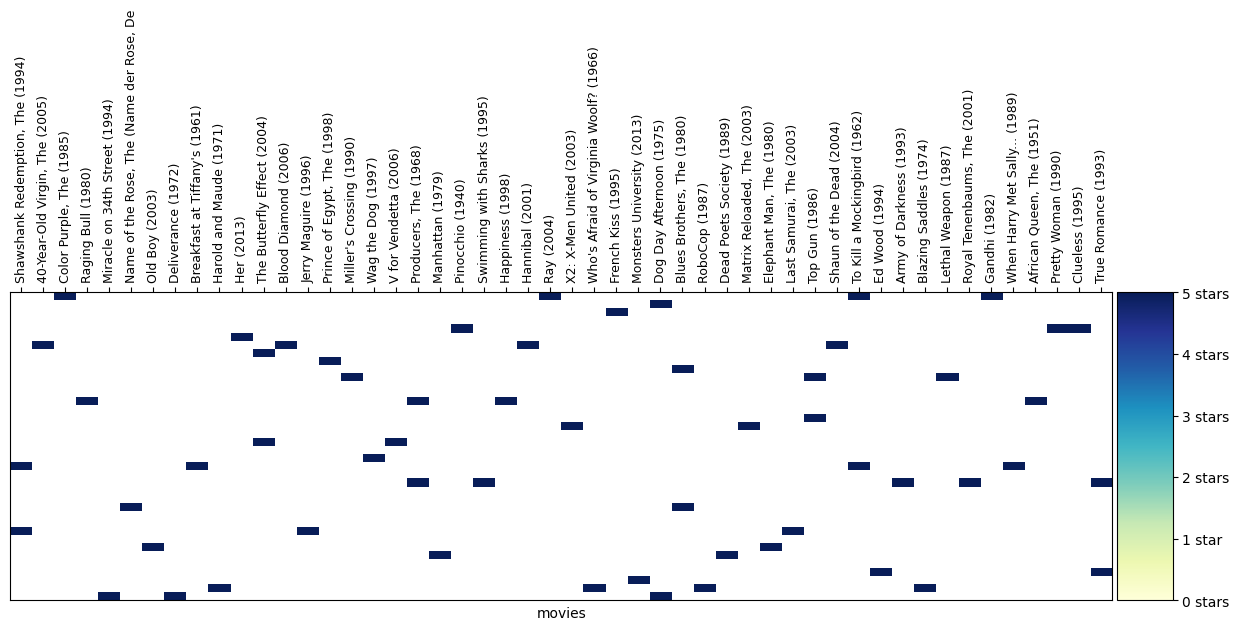

<ipython-input-47-521ebbeec1e3>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  given_ratings = given_ratings.append(given_ratings.count(), ignore_index=True)


    counts  Shawshank Redemption, The (1994)  Pulp Fiction (1994)  \
0       31                               NaN                  NaN   
1       33                               5.0                  NaN   
2       34                               5.0                  NaN   
3       32                               NaN                  NaN   
4       33                               NaN                  NaN   
5       33                               NaN                  NaN   
6       34                               NaN                  NaN   
7       33                               NaN                  NaN   
8       32                               NaN                  NaN   
9       33                               NaN                  NaN   
10      33                               NaN                  NaN   
11      31                               NaN                  NaN   
12      35                               NaN                  NaN   
13      35                        

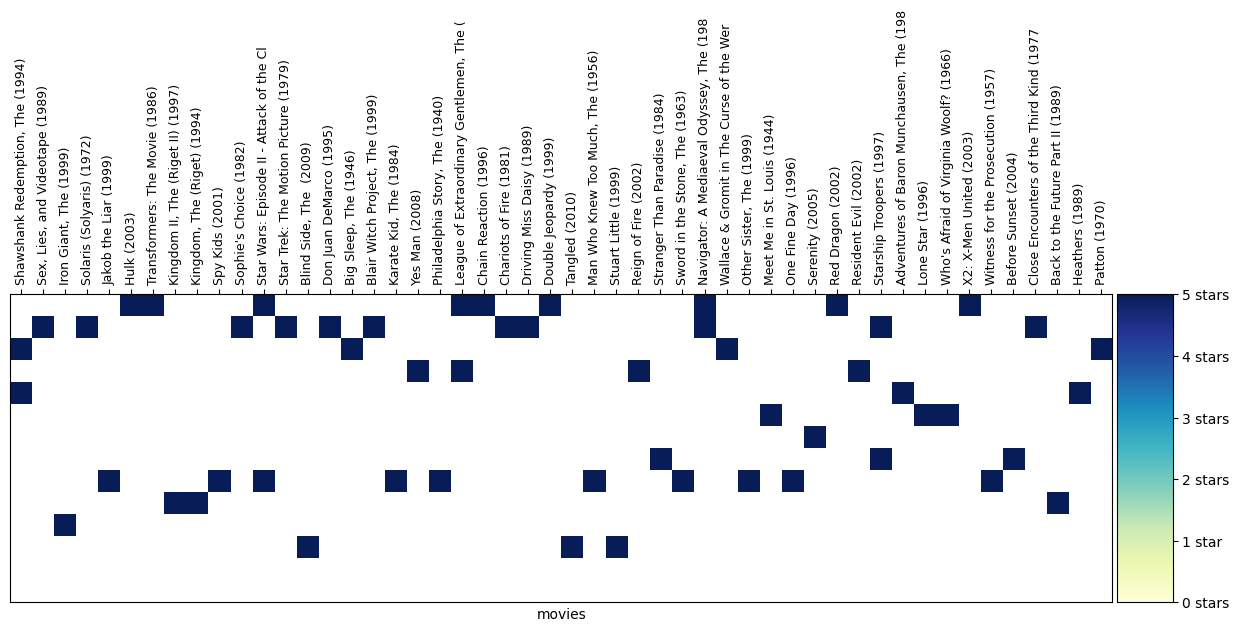

<ipython-input-47-521ebbeec1e3>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  given_ratings = given_ratings.append(given_ratings.count(), ignore_index=True)


    counts  Shawshank Redemption, The (1994)  Pulp Fiction (1994)  \
0        5                               NaN                  NaN   
1        5                               NaN                  NaN   
2        5                               NaN                  NaN   
3        5                               NaN                  NaN   
4        5                               NaN                  NaN   
5        5                               5.0                  NaN   
6        5                               NaN                  NaN   
7        5                               NaN                  NaN   
8        5                               NaN                  NaN   
9        5                               NaN                  NaN   
10       5                               NaN                  NaN   
11       5                               NaN                  NaN   
12       5                               NaN                  NaN   
13       5                        

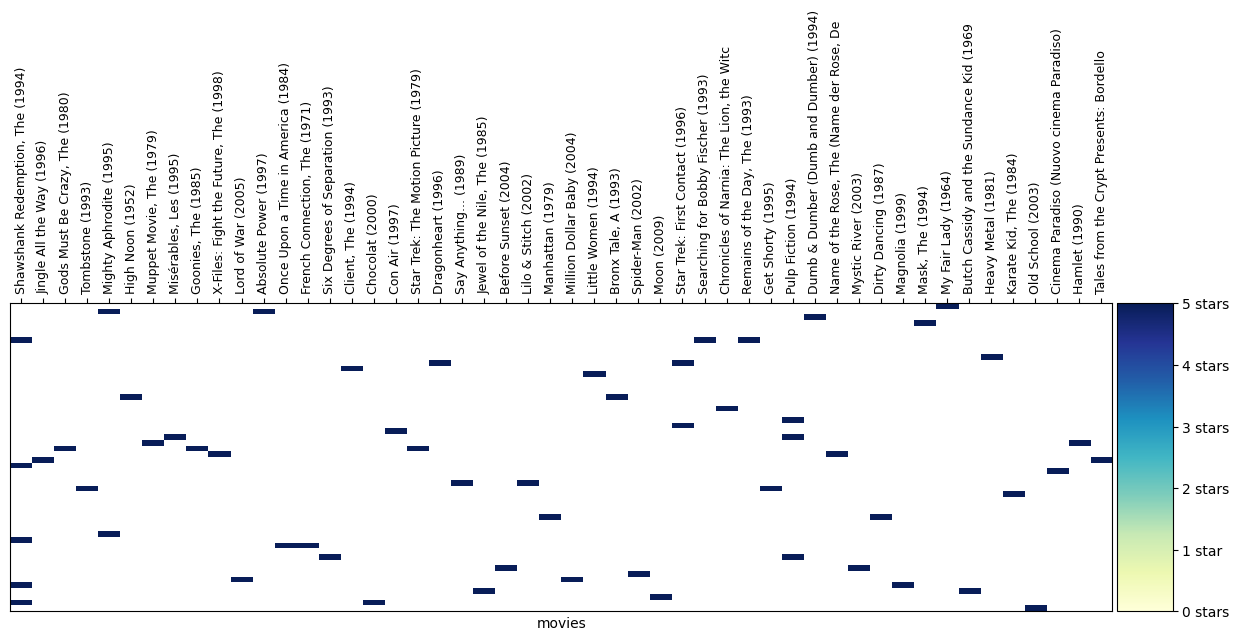

<ipython-input-47-521ebbeec1e3>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  given_ratings = given_ratings.append(given_ratings.count(), ignore_index=True)


    counts  Shawshank Redemption, The (1994)  Pulp Fiction (1994)  \
0       17                               NaN                  NaN   
1       17                               NaN                  NaN   
2       18                               5.0                  NaN   
3       17                               NaN                  NaN   
4       18                               NaN                  NaN   
5       18                               NaN                  NaN   
6       17                               NaN                  NaN   
7       17                               5.0                  NaN   
8       18                               NaN                  NaN   
9       17                               NaN                  NaN   
10      19                               NaN                  NaN   
11      17                               5.0                  NaN   
12      17                               NaN                  NaN   
13      17                        

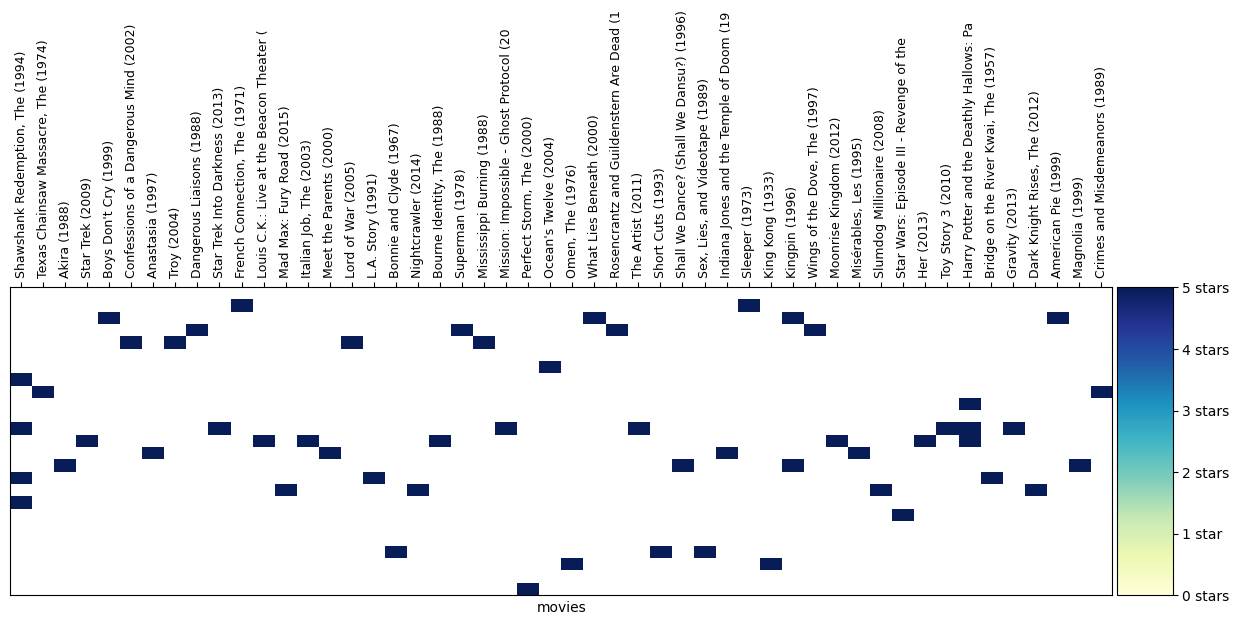

   counts  Shawshank Redemption, The (1994)  Pulp Fiction (1994)  \
0      56                               NaN                  NaN   
1      50                               NaN                  NaN   
2      58                               NaN                  5.0   
3       3                               0.0                  1.0   

   Forrest Gump (1994)  Star Wars: Episode IV - A New Hope (1977)  \
0                  NaN                                        NaN   
1                  NaN                                        NaN   
2                  4.5                                        NaN   
3                  1.0                                        0.0   

   Silence of the Lambs, The (1991)  Usual Suspects, The (1995)  \
0                               NaN                         NaN   
1                               NaN                         NaN   
2                               NaN                         NaN   
3                               0.0          

<ipython-input-47-521ebbeec1e3>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  given_ratings = given_ratings.append(given_ratings.count(), ignore_index=True)
<ipython-input-47-521ebbeec1e3>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  given_ratings = given_ratings.append(given_ratings.count(), ignore_index=True)
<ipython-input-47-521ebbeec1e3>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  given_ratings = given_ratings.append(given_ratings.count(), ignore_index=True)
<ipython-input-47-521ebbeec1e3>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  given_ratings = given_ratings.append(given_ratings.count(), ignore_index=True)
<ipy

In [ ]:
kmeans = KMeans(n_clusters=20)

    # Fit the model to the data and obtain the predicted cluster 6labels
kmeans.fit(s_r)
predictions = kmeans.predict(s_r)
max_users = 70
maxi_movies = 50
clustered = pd.concat([most_rat_1.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
draw_movie_clusters(clustered, max_users, maxi_movies)

In [ ]:
movie.head()

,index,movieId,title,genres
0,0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,2,Jumanji (1995),Adventure|Children|Fantasy
2,2,3,Grumpier Old Men (1995),Comedy|Romance
3,3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,4,5,Father of the Bride Part II (1995),Comedy


<ipython-input-47-521ebbeec1e3>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  given_ratings = given_ratings.append(given_ratings.count(), ignore_index=True)


    counts  Shawshank Redemption, The (1994)  Pulp Fiction (1994)  \
0       31                               NaN                  NaN   
1       33                               5.0                  NaN   
2       34                               5.0                  NaN   
3       32                               NaN                  NaN   
4       33                               NaN                  NaN   
5       33                               NaN                  NaN   
6       34                               NaN                  NaN   
7       33                               NaN                  NaN   
8       32                               NaN                  NaN   
9       33                               NaN                  NaN   
10      33                               NaN                  NaN   
11      31                               NaN                  NaN   
12      35                               NaN                  NaN   
13      35                        

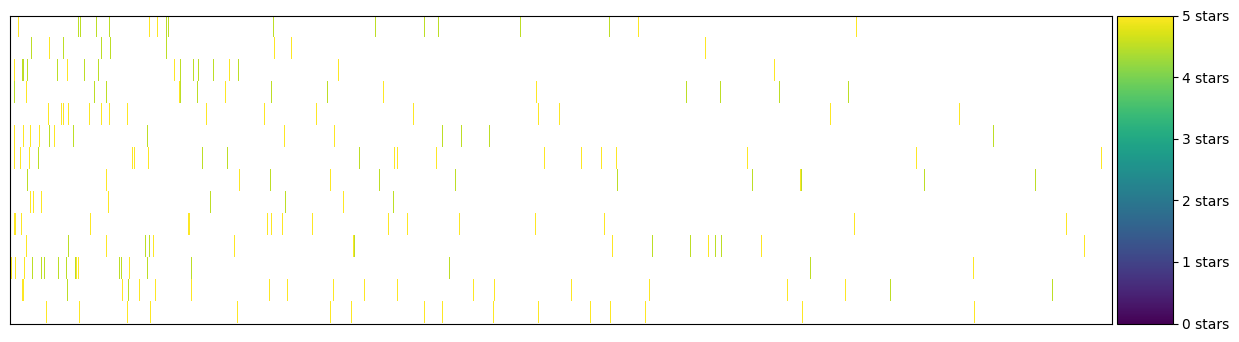

,counts,"Shawshank Redemption, The (1994)",Pulp Fiction (1994),Forrest Gump (1994),Star Wars: Episode IV - A New Hope (1977),"Silence of the Lambs, The (1991)","Usual Suspects, The (1995)","Godfather, The (1972)",Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981),Star Wars: Episode V - The Empire Strikes Back (1980),...,"Edukators, The (Die Fetten Jahre sind vorbei) (2004)",Eight Below (2006),My Darling Clementine (1946),My Best Friend's Wedding (1997),Mutiny on the Bounty (1935),"Music Man, The (1962)",Murderball (2005),Murder in the First (1995),Murder at 1600 (1997),"'burbs, The (1989)"
26,32,,,,,,,,,,...,,,,,,,,,,
50,34,5.0,,,,,,,,,...,,,,,,,,,,
168,35,5.0,,,5.0,,,,5.0,5.0,...,,,,,,,,,,
278,33,,,,,,,,,4.5,...,,,,,,,,,,
388,34,,,,,,,,5.0,,...,,,,,,,,,,


In [ ]:
c_number = 5
n_users = 75
n_movies = 300
c= clustered[clustered.group == c_number].drop(['index', 'group'], axis=1)
cluster = sort_density(c, n_movies, n_users)
draw_movies_heatmap(c, axis_labels=False)
c.fillna('').head()

In [ ]:
title = ("Usual Suspects, The (1995)")
c[title].mean()
c.mean().head(20)

counts                                                                            34.000
Shawshank Redemption, The (1994)                                                   5.000
Pulp Fiction (1994)                                                                  NaN
Forrest Gump (1994)                                                                5.000
Star Wars: Episode IV - A New Hope (1977)                                          5.000
Silence of the Lambs, The (1991)                                                     NaN
Usual Suspects, The (1995)                                                           NaN
Godfather, The (1972)                                                                NaN
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)     5.000
Star Wars: Episode V - The Empire Strikes Back (1980)                              4.900
Schindler's List (1993)                                                              NaN
Braveheart (1995)    

KNN

In [ ]:
movie = movie.reset_index()
movie

,level_0,index,movieId,title,genres
0,0,0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,1,2,Jumanji (1995),Adventure|Children|Fantasy
2,2,2,3,Grumpier Old Men (1995),Comedy|Romance
3,3,3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,4,4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...,...,...
34203,34203,34203,151697,Grand Slam (1967),Thriller
34204,34204,34204,151701,Bloodmoney (2010),(no genres listed)
34205,34205,34205,151703,The Butterfly Circus (2009),Drama
34206,34206,34206,151709,Zero (2015),Drama|Sci-Fi


In [ ]:
idx=pd.Series(movie.index, index=movie['movieId'])

In [ ]:
tit_t= pd.merge(ratings, movie[['movieId', 'title']], on='movieId' )
given_ratings = pd.pivot_table(tit_t, index='movieId', columns= 'userId', values='rating')
given_ratings.iloc[:6, :10]

userId,1,3,4,7,9,12,13,14,15,16
movieId,,,,,,,,,,
1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from sklearn.neighbors import NearestNeighbors
rating=csr_matrix(given_ratings.values)
cs_d = csr_matrix(given_ratings)

In [ ]:
rating

<2293x1244 sparse matrix of type '<class 'numpy.float64'>'
	with 2852492 stored elements in Compressed Sparse Row format>

In [ ]:
# Create an imputer object with a suitable strategy (e.g., mean, median, etc.)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to the data and transform the data
cs_d = imputer.fit_transform(cs_d)
rating = imputer.fit_transform(rating)

In [ ]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20)
knn.fit(rating)
y = movie[movie['title'] == "Usual Suspects, The (1995)"]

if len(y):
    id = y.index[0]
    print(id)

    # get the 20 nearest neighbors of the given movie index
    distances, indices = knn.kneighbors(cs_d[id], n_neighbors=20)
    print("Neighbor Indices:", indices)

    # print the titles of the nearest neighbor movies
    for i in indices[0]:
        if i !=id:
            movie_title = movie.loc[movie.index == i, 'title'].values[0]
            print(movie_title)


49
Neighbor Indices: [[1633  962   49  688  710  712  704 1761  666  687  684  689  681  677
  1794  674  670 1775  686  705]]
Alien: Resurrection (1997)
Yes, Madam (a.k.a. Police Assassins) (a.k.a. In the Line of Duty 2) (Huang gu shi jie) (1985)
Angus (1995)
Haunted World of Edward D. Wood Jr., The (1996)
Craft, The (1996)
Switchblade Sisters (1975)
Slappy and the Stinkers (1998)
Hostile Intentions (1994)
To Cross the Rubicon (1991)
Butterfly Kiss (1995)
Daens (1992)
Under the Domim Tree (Etz Hadomim Tafus) (1994)
Operation Dumbo Drop (1995)
Little Men (1998)
Windows (1980)
Alphaville (Alphaville, une étrange aventure de Lemmy Caution) (1965)
Real Blonde, The (1997)
Delta of Venus (1995)
Mouth to Mouth (Boca a boca) (1995)
